연속된 y의 값을 디지털과 같이 0,1처럼 끊어 주는 과정   
y = ax+b 의 경우의 y는 카테고리하지 않다 - 이는 리그레션
classification 한것이 필요하다. (ex) 무지개 역시도 7색으로 classification으로 만든 것이다) 
regression - classification으로 만들려는 것이다 
y값에다 0,1로 가도록 해버리는 것이 - sigmoid라는 것이다 
끝에다가 0 직전에 sigmoid를 걸어준다고 생각하면 된다. 생김새가 linear하지 않기 떄문에 
00000111111111111 not-linear를 부과시켜 준다고 한다 (code상 activation) 
yes or no 로 인식하게 만들어 놓는 것이다. 
tensorflow.keras - 파이썬을 기본으로 돕니다. 
직접 정보를 구할 수 없기에 구글에서 제공하는 data set을 이용하기로한다. 
보스턴은 엑셀에 칼럼이 14개 x 13 y 1 

그림에 100 * 100의 픽셀이 있다 총 숫자의 개수는 - 3만개 - 흑백이면 1만개 - 검흰은 0,1로 표현하면 되니까 // 컬러니까 RGB 3층이니까 칼라는 곱하기 3을 하면 되는 것임
이러한 것의 연속인 100개의 레이블은 어떻게  저장? 
0~99 /1~100 중에 택해서 저장하면 된다. ex) 흑인은 77로 고유값을 준다
imdb는 좋다 안좋다는 1,0 으로 classification 
크롤링 - 을 통해 추출하면 됨

mnist - 흑백 / 숫자 - digit classfication - base - 

reuter - 뉴스 데이터 

각 6개 모두 sound를 제외(복잡 데이터 셋에서도 제외) - text에 대한 advanced 
 


In [1]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

In [3]:
x_train.shape

(404, 13)

데이터의 개수 샘플은 404개 - 13개 짜리의 샘플이 404개 있다 

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
x_train[:,1]

In [ ]:
plt.plot(x_train[:,0],y_train,'.')

여기서 y값들은 집 값 - 0부터 100까지 있으니까 - 퍼센트로 만들어 놓은것 - 0퍼센트인 것과 100퍼센트 가까운곳의 차이 
x와 y의 관계를 알 수 있고 linear관계는 아니구나 라는 것을 알 수 있음 20을 기준으로 바닥 쳐버림

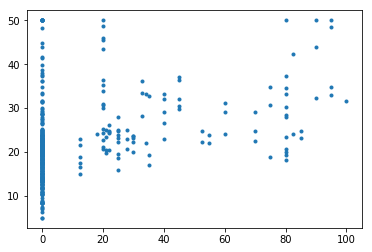

In [5]:
plt.plot(x_train[:,1],y_train,'.')

residential은 랜덤 함 - 경향만 조금 있을 뿐 

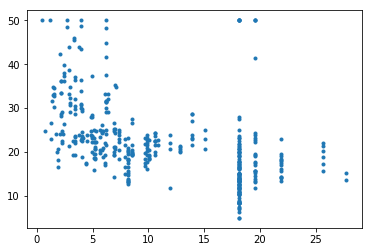

In [6]:
plt.plot(x_train[:,2],y_train,'.')

whole sale 관련 많으면 떨어짐 (non-linear한 관계가 대부분) 

In [7]:
y_test.shape

(102,)

한꺼번에 플롯하기

<function matplotlib.pyplot.show(*args, **kw)>

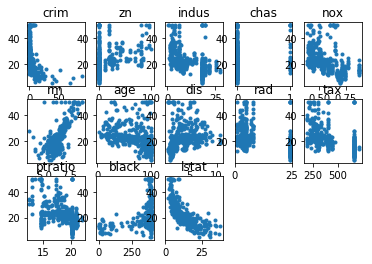

In [8]:
boston_housing = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
for i in range(13):    
    plt.subplot(3,5,i+1)  # it is because i start at zero 
    plt.plot(x_train[:,i],y_train,'.')
    plt.title(boston_housing[i])
plt.show  

In [9]:
model = Sequential() 
model.add(Dense(1, input_shape=[13])) 
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


입력이 동그라미 13개 출력이 1개 두번째 것으로 알 수 있는 것이다. 훈련을 해야하는 것은 화살표에 있는 값들 / regression의 경우에는 rmsprop mse
적으면 된다고 했음 / summuary라고 해서 - 밑에 summuary - 왜 토탈 14라고 써있을까? - y=ax / y=ax+b  - 훈련해야 할 것이 2개 
제일 마지막에 y절편이 붙는 다는 것이다. 그래서 실질상 14개라는 것이라 말하는 것이다. 맨 마지막에 1이 붙어서 화살표에 실질적으로 연결 되어 있다 이는 b라
는 화살표 

In [ ]:
model.fit(x_train, y_train, epochs=1000)

### 히든 레이어를 넣는 방법 

In [15]:
model = Sequential() 
model.add(Dense(10, input_shape=[13]))
model.add(Dense(1))  
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = Sequential() 
model.add(Dense(10, input_shape=[13]))# ten node one hidden layer
model.add(Dense(20))
model.add(Dense(1))          
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


아래 거 입력 13개 히든레이어 1개 사용 결과 값 한개 // parameter의 숫자 - 화살표 - y =ax+b a와b가 parameter- 
x1 x2가 있다고 가정하면 1이라는 y절편을 붙이기 위한 값 필요 - 그래서 입력값보다 +1 더 나오게 되있음 
화살표의 개수가 = param#이 되는 것이다. 여기서는 히든이 10개 입력값+1 14 * 10 이니까 140개가 되는 것 
히든레이어에서도 마찬가지의 이유로 1을 붙임 - 그러나 140이 나온이유는 앞에서는 그 1을 연결할 필요가 없으므로 그래서 11개가 되는 것이다.
계속 이러한 시퀀스가 반복된다고 보면된다.

또한 여기서 결과값에 아무것도 안줬음 - 왜냐하면 성격이 그러하니까 - 남/녀 이런게 아니라 - 숫자가 사용되는거니까

In [18]:
model = Sequential() 
model.add(Dense(10, input_shape=[13],activation = 'relu'))
model.add(Dense(1))  
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


하면 loss가 처음부터 적다는 것을 알 수 있다.

fit = 훈련이라는 말 (80퍼센트 데이터 사용 ) - // 잘되었나 잘 안되었나 (안쓴 데이터 20퍼센트 데이터 사용)

x,y test는 ?

In [35]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 792us/sample - loss: 30.3416


30.341600754681757

In [78]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


In [105]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

model.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[190.32436]], dtype=float32)

predict는 실제 쓸때 상품화 시킬때 사용

ax1+ax2+a3x3 ----- 해서 13개 x1이 a1이라는 화살표 x2라는 원이 a2라는 곳 변하는 부분은 a1,a2,a3 부분 
이러한 a1--a13까지를 교육시키는 것이다. x와 y는 데이터이다. x,y는 데이터임. 다른 부분은 학습되는 부분이다. 
예측을 잘하는 것이 중요하다. 그러나 중간에 히든 레이어(숨겨진 동그라미)를 집어 넣어주어 성능을 올려줘야한다
model fit = train , model evaluate = test(쓰지 않았던 데이터를 사용해서)
model predict - 상품화 = 입력만 있는 상태이다 inferance라고 불린다. (이러한 상태는 80퍼센트의 완성임)
다이렉트로 연결하는게 아닌 중간단계를 만들어 더 자세하게 만드는 것을 히든레이어 라는 과정을 해야한다.
동그라미는 = nod 나의 선택임 여러개 둘수 있음 // 각 히든레이어에 노드에 중간에 있는 선의 개수는 x곱하기 nod개수
x가 4개 nod 5개 면 4 * 5 의 행렬 // 입력 백터 히든레이어 백터 출력 백터 - 중간의 화살표 (weight)는 무조건 행렬이다

프로그래밍에 영향을 미치는 것 - 히든 레이어의 수 / 히든 레이어의 노드의 수 / epochs - 1 epochs는 모든 데이터 1번씩
쓰는거 - 1000이면 각각 1000번씩 쓰게 되는 것이다.  / activation - hidden layer와 마지막 결과 값에  non -
linearity는 부여 가능하다. non-linear를 [0,1]사이로 압축 시켜주는 것이다. - 이를 activation이라고 한다
ex) sigmoid(모든 값을 0하고 1사이로 넣어 버리는 것)- / tanh[-1 하고 1] / relu [-는 무조건 0처리 
플러스 값은 그대로 아무것도 하지 말아라] y = x 3개를 사용한다. (그래프 잘그려서 생각해봐라)
이러한 작업들을 스쿼시 펑션이라고 한다. 


마지막 softmak - 값들을 총합이 1이 되도록 만드는 것이다. ex) 히든레이어에 3 1 9 2 가 나왔다고 치면 - 15
3/15 1/15 9/15 2/15 이런식으로 총합분의 1로 해서 만드는 것 - 소프트 맥스는 총합을 나눠준다 - 확률화 시킨다
activiation - 남녀이면 시그모이드(yes or no)의 경우에는 마지막 출력값에 sigmoid를 걸어놓으면 된다 
0하고 1사이에 어떤 값으로 된다(binerary).
sigmak는 - 확률(multiple choice의 경우) 

지금까지한것들 - 입력이 continouns한것을 regression / 그렇지 아니한 것은 - 출력이 classification - 이라고 한다. 

activation은 - 히든 레이어에 둘수있다. (sig,tanh,relu) - 모두에 둘 수 있음 - 임의적으로 편하게 계산하기 위에
. 결과 값에서도 줄 수 있지만 regression일 때는 아무것도 안주면된다. classfication일 때는 남/녀 - sigmoid(bineray) / softmax(multineray) 

다음에 할 것은 mnist - 1 2 3 보고 이를 구분 하는 거  - 컴퓨터가 분류해준다. 

In [ ]:
결과값을 합칠 때 regression 일 때는 rmsprop / classfication은 adam /  